In [8]:
##  IMPORTS
%matplotlib inline
import unittest
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline


import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../src/dataStructures')
sys.path.append('../src/utilities')

from AtomStruct import Atom

In [4]:
## Test reading and plotting

def testReadingRadialData():
        atomicNumber = 5   
        AtomicDataPath = '/Users/nathanvaughn/AtomicData/allElectron/z'+str(atomicNumber)+'/singleAtomData/'
        print(AtomicDataPath)
        print(os.listdir(AtomicDataPath))
        
        
        plt.figure()  
        data = np.genfromtxt(AtomicDataPath+'density.inp')
#         print('rho[0] = ', data[0,1])
        print('Number of points: ', len(data[:,1]))

#         plt.semilogy(data[:,0],data[:,1],label='Density')
        plt.plot(data[:,0],data[:,1],'o',label='Density')
        plt.plot(data[:,0],data[:,0],'o',label='Radial points')
        
#         r = data[:,0]
#         P = np.zeros_like(r)
#         k2 = np.sqrt(2*0.4)
#         for i in range(len(r)):
#             P[i] = piecewiseExp(r[i], 0.45, 2*atomicNumber, 2*k2, data[0,1])
#         plt.semilogy(r,P,label='Piecewise Exponential')

        plt.plot(data[:,0],np.sqrt(data[:,1]),'o',label='sqrt(Density)')
#         plt.plot(data[:,0],np.sqrt(data[:,1])*(1+1/data[:,0]),label='sqrt(Density)')
#         plt.plot(data[:,0],(data[:,1])*(1+1/data[:,0]),label='(Density)(1+1/r)')
#         plt.plot(data[:,0],(data[:,1])*(data[:,0]**2),label='(Density)*r**2')
#         plt.plot(data[:,0], data[0,1]*np.exp(-2*atomicNumber*data[:,0]), 'r-')
#         plt.plot(data[:,0], data[0,1]*np.exp(-2*np.sqrt(2*0.3)*atomicNumber*data[:,0]), 'k-')
        plt.legend()
#         print(data[:,0])
        r=data[:,0]
        density=data[:,1]
#         print('\n\n\n')
#         print(data[:,1])
        left = 0
        right = 0
        for i in range(len(density)-1):
            left += density[i]*(r[i+1]-r[i])
            right += density[i+1]*(r[i+1]-r[i])
        trap = 1/2*(left+right)
        print('Left = ', left)    
        print('Right = ', right)
        print('Integrated density: ', trap)
        
        
# #         plt.figure() 
#           
#         for orbital in os.listdir(AtomicDataPath):
#             if orbital[:3]=='psi':
# #             if orbital[:5]=='psi32':
#                 print(orbital)
#                 data = np.genfromtxt(AtomicDataPath+orbital)
#                 plt.semilogy(data[:,0],np.abs(data[:,1]),label=orbital[:-4])
# #                 plt.semilogy(data[:,0],np.abs(data[:,1]**2),label=orbital[:-4]+' squared')
# #                 plt.plot(data[:,0],np.sign(data[-1,1])*data[:,1],label=orbital[:-4])
# #         xi = np.sqrt(2*0.2)
# #         plt.plot(data[:,0], np.sqrt(xi**3/np.pi) *np.exp(-xi*atomicNumber*data[:,0]), 'r-')
# #                 
# #         
# # #         data0 = np.genfromtxt(AtomicDataPath+'psi10.inp')
# # #         r0 = data0[:,0]
# # #         psi0 = data0[:,1]
# # #         
# # #         data1 = np.genfromtxt(AtomicDataPath+'psi20.inp')
# # #         r1 = data1[:,0]
# # #         psi1 = data1[:,1]
# # #         [r0, phi0] = np.genfromtxt(AtomicDataPath+'psi10.inp')
# # #         [r1, phi1] = np.genfromtxt(AtomicDataPath+'psi20.inp')
# #         
# # #         plt.figure()
# # #         plt.plot(r0,psi0,'b',label='psi10')
# # #         plt.plot(r1,psi1,'g',label='psi20')
        plt.legend()
        plt.xlabel('radius')
        plt.show()
        
testReadingRadialData()

/Users/nathanvaughn/AtomicData/allElectron/z5/singleAtomData/
['psi30.inp', 'psi31.inp', 'psi32.inp', 'psi21.inp', 'psi20.inp', 'density.inp', 'psi10.inp']
Number of points:  1801
Left =  7.386159678112966
Right =  7.33331926099244
Integrated density:  7.359739469552703


KeyboardInterrupt: 

In [20]:
LiAtom = Atom(0,0,0,3,2)
# LiAtom.orbitalInterpolators()
print(LiAtom.interpolators)
# print(LiAtom.interpolators['psi10'])

Setting up interpolators.
Using single atom data from:
/Users/nathanvaughn/AtomicData/allElectron/z3/singleAtomData/
psi21
2.526468646182557e-07 19.999949470627104
1.606380281234764e-07 0.0010008495582174261 

psi20
2.526468646182557e-07 19.999949470627104
1.6372365930983548 -8.020481655183427e-05 

psi10
2.526468646182557e-07 19.999949470627104
9.159400726160007 -1.8138087313078812e-12 

Set up atom with z= 3
{'psi21': <scipy.interpolate.fitpack2.InterpolatedUnivariateSpline object at 0x7ffdd8ce6550>, 'psi20': <scipy.interpolate.fitpack2.InterpolatedUnivariateSpline object at 0x7ffdd8ce6e48>, 'density': <scipy.interpolate.fitpack2.InterpolatedUnivariateSpline object at 0x7ffdd8ce67f0>, 'psi10': <scipy.interpolate.fitpack2.InterpolatedUnivariateSpline object at 0x7ffdd8ce6400>}


In [13]:
N=19
r = np.linspace(0,50,N)
print(r)
LiAtom.interpolators['psi10'](r)



[ 0.          2.77777778  5.55555556  8.33333333 11.11111111 13.88888889
 16.66666667 19.44444444 22.22222222 25.         27.77777778 30.55555556
 33.33333333 36.11111111 38.88888889 41.66666667 44.44444444 47.22222222
 50.        ]


array([ 9.15941651e+00,  1.08585496e-02,  3.07886672e-05,  1.02400676e-07,
        3.76557060e-10,  1.47950251e-11, -3.84702879e-12, -2.99252280e-12,
       -2.43446652e-11, -1.50422785e-10, -4.45021353e-10, -9.72134373e-10,
       -1.79575466e-09, -2.97987413e-09, -4.58847893e-09, -6.68553923e-09,
       -9.33515309e-09, -1.26011344e-08, -1.65476877e-08])

In [34]:
def orbitalInterpolators(atomicNumber,verbose=1):
  

    """
    * if ext=0 or 'extrapolate', return the extrapolated value.
    * if ext=1 or 'zeros', return 0
    * if ext=2 or 'raise', raise a ValueError
    * if ext=3 of 'const', return the boundary value. 
    """


    interpolators = {}
    # search for single atom data, either on local machine or on flux
    if os.path.isdir('/Users/nathanvaughn/AtomicData/allElectron/z'+str(int(atomicNumber))+'/singleAtomData/'):
        # working on local machine
        path = '/Users/nathanvaughn/AtomicData/allElectron/z'+str(int(atomicNumber))+'/singleAtomData/'
    elif os.path.isdir('/home/njvaughn/AtomicData/allElectron/z'+str(int(atomicNumber))+'/singleAtomData/'):
        # working on Flux or Great Lakes
        path = '/home/njvaughn/AtomicData/allElectron/z'+str(int(atomicNumber))+'/singleAtomData/'
    else:
        print('Could not find single atom data...')
        print('Checked in: /Users/nathanvaughn/AtomicData/allElectron/z'+str(int(atomicNumber))+'/singleAtomData/')
        print('Checked in: /home/njvaughn/AtomicData/allElectron/z'+str(int(atomicNumber))+'/singleAtomData/')


    if verbose>0: print('Using single atom data from:')
    if verbose>0: print(path)
    for singleAtomData in os.listdir(path): 
        if singleAtomData[:3]=='psi':
            data = np.genfromtxt(path+singleAtomData)
#             print(singleAtomData[:5])
#             print(data[0,0], data[-1,0])
#             print(data[0,1], data[-1,1],"\n")
            interpolators[singleAtomData[:5]] = InterpolatedUnivariateSpline(data[:,0],data[:,1],k=3,ext=0)
        elif singleAtomData[:7]=='density':
            data = np.genfromtxt(path+singleAtomData)
            interpolators[singleAtomData[:7]+"_extrap"] = InterpolatedUnivariateSpline(data[:,0],data[:,1],k=3,ext='extrapolate')
            interpolators[singleAtomData[:7]+"_const"] = InterpolatedUnivariateSpline(data[:,0],data[:,1],k=3,ext='const')
            interpolators[singleAtomData[:7]+"_zeros"] = InterpolatedUnivariateSpline(data[:,0],data[:,1],k=3,ext='zeros')
#                 interpolators[singleAtomData[:7]] = InterpolatedUnivariateSpline(data[:,0],data[:,1],k=3,ext='const')
    return interpolators

Using single atom data from:
/Users/nathanvaughn/AtomicData/allElectron/z5/singleAtomData/


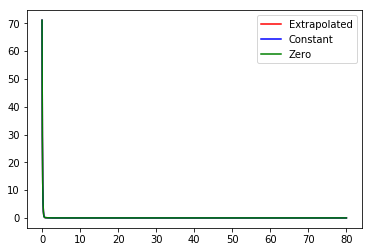

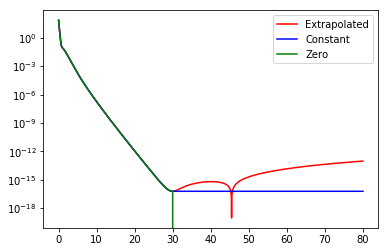

In [36]:
interpolators = orbitalInterpolators(5)
# interpolators

N=10000
r=np.linspace(0,80,N)

plt.figure()
plt.plot(r,interpolators['density_extrap'](r),'r-',label='Extrapolated')
plt.plot(r,interpolators['density_const'](r),'b-',label='Constant')
plt.plot(r,interpolators['density_zeros'](r),'g-',label='Zero')
plt.legend()

plt.figure()
plt.semilogy(r,np.abs( interpolators['density_extrap'](r) ),'r-',label='Extrapolated')
plt.semilogy(r,np.abs( interpolators['density_const'](r) ),'b-',label='Constant')
plt.semilogy(r,np.abs( interpolators['density_zeros'](r) ),'g-',label='Zero')
plt.legend()


plt.show()
